Nome: Christian da Rocha Iardino - RA: 002201700152

Nome: Lucas Alves da Silva - RA: 002201600803

Nome: Yan Strublic de Oliveira - RA: 002201601497

## Controle de Dosador Automático.


---
Um dosador é um equipamento industrial que deve dosar uma qunatidade de material exata em um processo, por exemplo, em uma empresa de salgadinhos deve ser dosado exatamente X gramas de sódio, Y gramas de ferro, Z gramas de trigro...

Existem vários modelos de dosadores, sendo eles por perda de peso e volumétricos.

Os dosadores volumétricos são extremamente simples e não possuem uma maneira concreta de corrigir automaticamente o peso sendo dosado, pois é programado o tempo que o equipamento deve estar ligado.

Porém os dosadores por perda de peso podem receber feedback constante, pois eles são montados em cima de uma balança e se houver qualquer alteração na densidade do material (como o grau de humidade no material) que está sendo dosado, ele pode detectar e corrigir para a próxima dosagem.







## Modelamento matemático Simplificado
---
Para o modelamento matemático deveremos considerar as seguintes variáveis:

$D_s$ $\Rightarrow$ Material sendo dosado [$\frac{kg}{s}$].

$\rho$ $\Rightarrow$ Desidade do material sendo dosado [$\frac{kg}{m^3}$].

$\omega$ $\Rightarrow$ Velocidade angular [$\frac{rad}{s}$]

$f$ $\Rightarrow$ Hertz do motor que controla a rosca dosadora [$Hz$].

$V$ $\Rightarrow$ Velocidade linear [$\frac{m}{s}$].

$\phi$ $\Rightarrow$ O diametro da saida do material [$m$].

---
Portanto temos que:

\begin{equation}
\omega = 2 \times \pi \times f
\end{equation}

Convertendo a velocidade angular para linear:
\begin{equation}
V = \omega \times \frac{\phi}{2}
\end{equation}

---

Portanto a quantidade de material sendo dosado é:

\begin{equation}
D_s = \rho \times V \times (\frac{\phi^2}{4} \times \pi)
\end{equation}

Portanto temos que a equação final deve ser:
\begin{equation}
D_s = \rho \times (2 \times \pi \times f \times \frac{\phi}{2})\times (\frac{\phi^2}{4} \times \pi)
\end{equation}

Simplificando a equação:
\begin{equation}
D_s = \frac{\pi^2}{4} \times \rho \times f \times \phi^3 
\end{equation}



## Modelamento matemático real
---
Como o diâmetro de um dosador não se altera, temos $\phi$ é constante. A única variável que temos controle é a frequência.
 
Portanto pode escrever a equação como:

\begin{equation}
D_s = \frac{\pi^2}{4} \times (\rho + \frac{d\rho}{dt}) \times f \times \phi^3 
\end{equation}

Como estaremos fazendo simulações computacionais numéricas finitas não usaremos a definição real de derivada, usaremos em seu lugar um delta com tempo discreto de 1 segundo.

#### Código

In [1]:
import random as rdm
import math
import matplotlib.pyplot as plt

In [2]:
d_s_desejado = rdm.randrange(5000) / 1000
rho = rdm.randrange(200, 2600)
delta_rho = 0
f_atual = 60
dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

erro_maximo = 0.01
max_iteracoes = 10
numero_testes = 16

desvio_d_s = []

desvio_d_s = []
parametros_execucao = []

In [3]:
def formula(f):
  return (pow(math.pi, 2) / 4) * (rho + delta_rho) * f * pow(dim, 3) - d_s_desejado

def derivada(x):
  h = 0.000001
  return (formula(x + h) - formula(x) ) / h

def newton_rapshon(f_atual_):
  return f_atual_ - (formula(f_atual_) / derivada(f_atual_))

def plot_grafico():
  fig, axs = plt.subplots(4 , 4, figsize=(21, 21))
  c1 = 0
  c2 = 0
  for n in range(len(desvio_d_s) - 1):
    axs[c2, c1].plot([i for i in range(len(desvio_d_s[n]))], desvio_d_s[n])
    axs[c2, c1].set_title("Teste numero : " + str(n + 1))
    axs[c2, c1].set(xlabel = "Iterações", ylabel = "Erro em [kg/s]")
    c1 += 1
    if c1 == 4:
      c1 = 0
      c2 += 1

def legendas():
  for n in range(len(desvio_d_s) - 1):
    print("Parametros teste ", n, ":\n  d_s_desejado:", parametros_execucao[n][0], "[Kg/s]\n  rho:", parametros_execucao[n][1], 
          "[Kg/m^3]\n  Somatória dos delta_rho:", parametros_execucao[n][2], "[Kg/m^3]\n  dim:", parametros_execucao[n][4], "[m]\n\n\n")

### Teste sem alteração na densidade

In [4]:
while len(desvio_d_s) <= numero_testes:
  temp = []
  for iteracoes in range(max_iteracoes):
    f_atual = newton_rapshon(f_atual)
    temp.append(formula(f_atual))
  if iteracoes == max_iteracoes - 1 and formula(f_atual) < erro_maximo:
    desvio_d_s.append(temp)
    parametros_execucao.append([d_s_desejado, rho, delta_rho, f_atual, dim])
  d_s_desejado = rdm.randrange(5000) / 1000
  rho = rdm.randrange(200, 2600)
  delta_rho = 0
  f_atual = 60
  dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

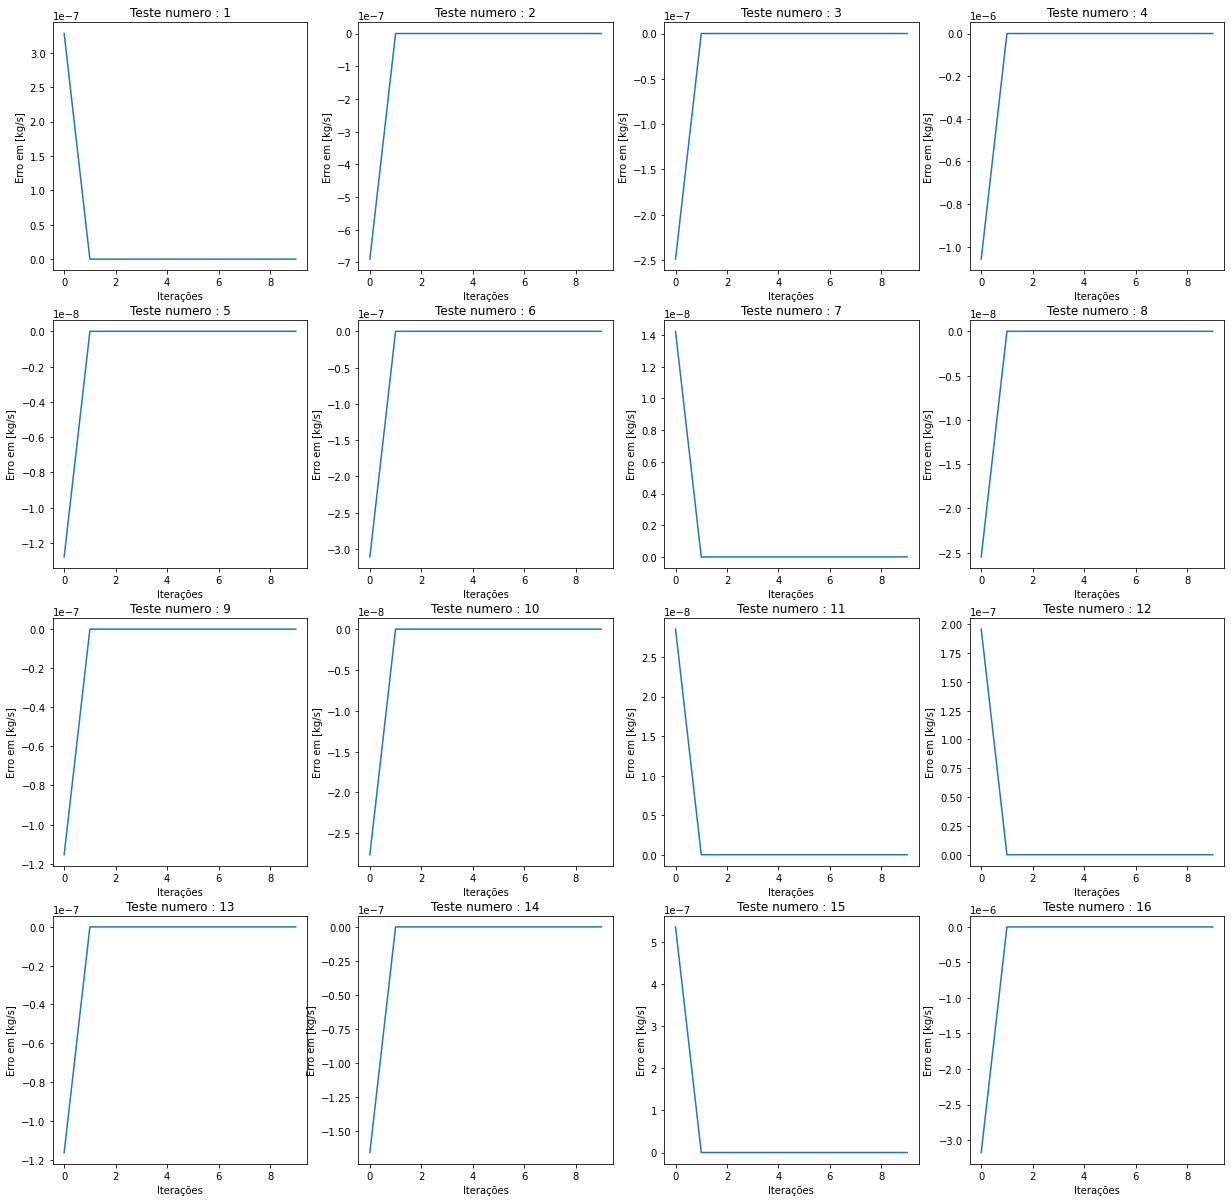

In [5]:
plot_grafico()

In [6]:
legendas()

Parametros teste  0 :
  d_s_desejado: 0.075 [Kg/s]
  rho: 1984 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.07619999999999999 [m]



Parametros teste  1 :
  d_s_desejado: 1.222 [Kg/s]
  rho: 795 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.1016 [m]



Parametros teste  2 :
  d_s_desejado: 3.319 [Kg/s]
  rho: 1899 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.0635 [m]



Parametros teste  3 :
  d_s_desejado: 1.381 [Kg/s]
  rho: 994 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.08889999999999999 [m]



Parametros teste  4 :
  d_s_desejado: 3.383 [Kg/s]
  rho: 2469 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.0635 [m]



Parametros teste  5 :
  d_s_desejado: 0.286 [Kg/s]
  rho: 760 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.1143 [m]



Parametros teste  6 :
  d_s_desejado: 0.756 [Kg/s]
  rho: 1592 [Kg/m^3]
  Somatória dos delta_rho: 0 [Kg/m^3]
  dim: 0.0508 [m]



Parametros teste  7 :
  d_s_desejado: 3.662 [Kg/s]
  rho: 19

###Com altrção na densidade teste 1

A cade 10 iterações ocorre um variação randomica na densidade

In [7]:
d_s_desejado = rdm.randrange(5000) / 1000
rho = rdm.randrange(200, 2600)
delta_rho = rdm.randrange(-20, 20)
f_atual = 60
dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

erro_maximo = 0.01
max_iteracoes = 100
numero_testes = 16

desvio_d_s = []

desvio_d_s = []
parametros_execucao = []

In [8]:
while len(desvio_d_s) <= numero_testes:
  temp = []
  delta = 0
  for iteracoes in range(max_iteracoes):
    f_atual = newton_rapshon(f_atual)
    if iteracoes % 10 == 0:
      delta_rho = rdm.randrange(-20, 20)
      if delta_rho <= 0:
        delta += (-1) * delta_rho
      else:
        delta += delta_rho
    temp.append(formula(f_atual))
  if iteracoes == max_iteracoes - 1 and formula(f_atual) < erro_maximo:
    desvio_d_s.append(temp)
    parametros_execucao.append([d_s_desejado, rho, delta, f_atual, dim])
  d_s_desejado = rdm.randrange(5000) / 1000
  rho = rdm.randrange(200, 2600)
  f_atual = 60
  dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

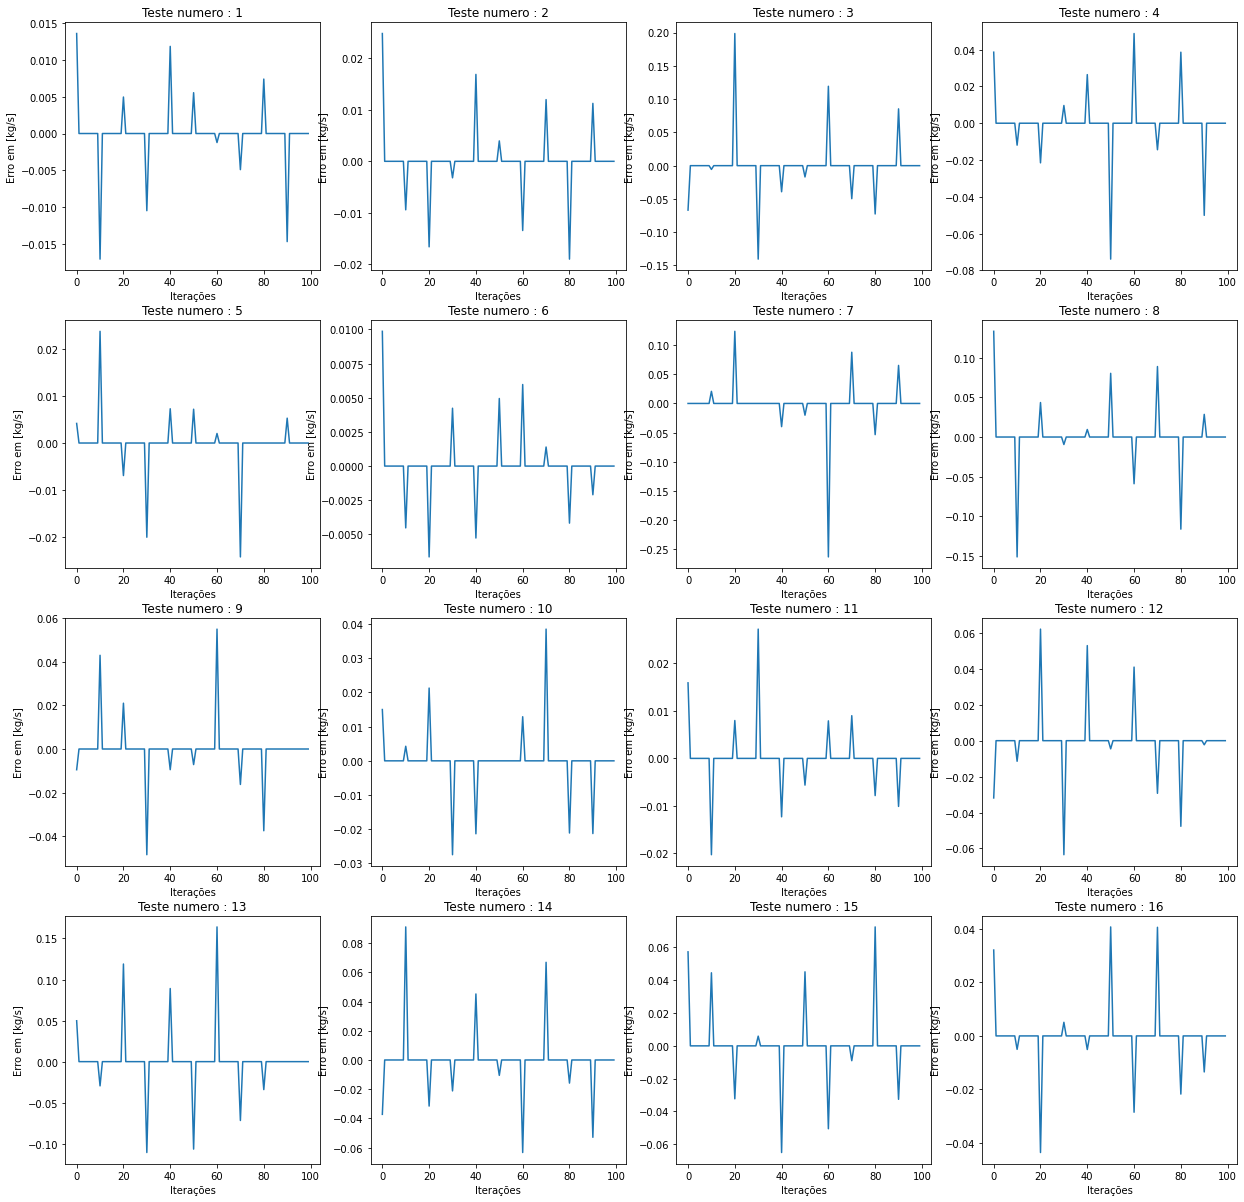

In [9]:
plot_grafico()

In [10]:
legendas()

Parametros teste  0 :
  d_s_desejado: 1.035 [Kg/s]
  rho: 1683 [Kg/m^3]
  Somatória dos delta_rho: 90 [Kg/m^3]
  dim: 0.1143 [m]



Parametros teste  1 :
  d_s_desejado: 1.246 [Kg/s]
  rho: 1566 [Kg/m^3]
  Somatória dos delta_rho: 106 [Kg/m^3]
  dim: 0.08889999999999999 [m]



Parametros teste  2 :
  d_s_desejado: 3.959 [Kg/s]
  rho: 715 [Kg/m^3]
  Somatória dos delta_rho: 124 [Kg/m^3]
  dim: 0.08889999999999999 [m]



Parametros teste  3 :
  d_s_desejado: 3.291 [Kg/s]
  rho: 1368 [Kg/m^3]
  Somatória dos delta_rho: 81 [Kg/m^3]
  dim: 0.0127 [m]



Parametros teste  4 :
  d_s_desejado: 0.532 [Kg/s]
  rho: 522 [Kg/m^3]
  Somatória dos delta_rho: 103 [Kg/m^3]
  dim: 0.0635 [m]



Parametros teste  5 :
  d_s_desejado: 0.802 [Kg/s]
  rho: 2289 [Kg/m^3]
  Somatória dos delta_rho: 97 [Kg/m^3]
  dim: 0.1143 [m]



Parametros teste  6 :
  d_s_desejado: 3.387 [Kg/s]
  rho: 328 [Kg/m^3]
  Somatória dos delta_rho: 100 [Kg/m^3]
  dim: 0.1016 [m]



Parametros teste  7 :
  d_s_desejado: 1.896 [Kg/s

###Com altrção na densidade teste 2

Alteração na densidade em intervalos aleatórios

In [11]:
d_s_desejado = rdm.randrange(5000) / 1000
rho = rdm.randrange(200, 2600)
delta_rho = rdm.randrange(-20, 20)
f_atual = 60
dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

erro_maximo = 0.01
max_iteracoes = 100
numero_testes = 16

desvio_d_s = []

desvio_d_s = []
parametros_execucao = []

In [12]:
intervalo = rdm.randint(0, 25)
while len(desvio_d_s) <= numero_testes:
  temp = []
  for iteracoes in range(max_iteracoes):
    f_atual = newton_rapshon(f_atual)
    if iteracoes % intervalo == 0:
      delta_rho = rdm.randrange(-20, 20)
      if delta_rho <= 0:
        delta += (-1) * delta_rho
      else:
        delta += delta_rho
    temp.append(formula(f_atual))
  if iteracoes == max_iteracoes - 1 and formula(f_atual) < erro_maximo:
    desvio_d_s.append(temp)
    parametros_execucao.append([d_s_desejado, rho, delta, f_atual, dim])
  d_s_desejado = rdm.randrange(5000) / 1000
  rho = rdm.randrange(200, 2600)
  f_atual = 60
  dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254

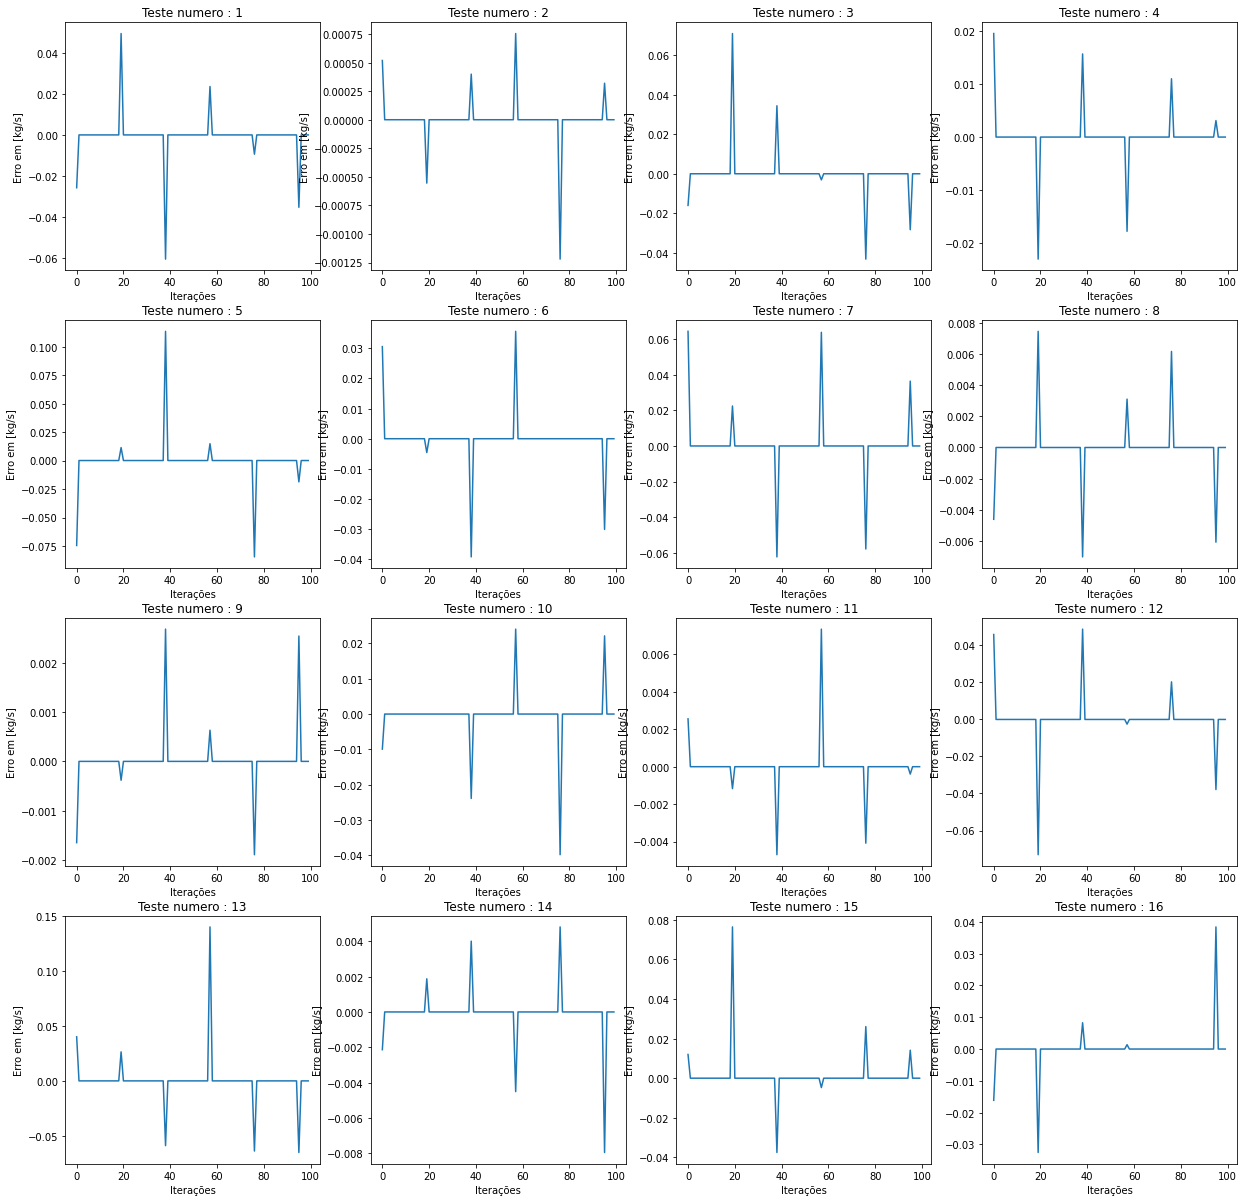

In [13]:
plot_grafico()

In [14]:
legendas()

Parametros teste  0 :
  d_s_desejado: 4.636 [Kg/s]
  rho: 1966 [Kg/m^3]
  Somatória dos delta_rho: 176 [Kg/m^3]
  dim: 0.038099999999999995 [m]



Parametros teste  1 :
  d_s_desejado: 0.084 [Kg/s]
  rho: 2123 [Kg/m^3]
  Somatória dos delta_rho: 249 [Kg/m^3]
  dim: 0.1143 [m]



Parametros teste  2 :
  d_s_desejado: 2.27 [Kg/s]
  rho: 720 [Kg/m^3]
  Somatória dos delta_rho: 311 [Kg/m^3]
  dim: 0.08889999999999999 [m]



Parametros teste  3 :
  d_s_desejado: 1.094 [Kg/s]
  rho: 1405 [Kg/m^3]
  Somatória dos delta_rho: 368 [Kg/m^3]
  dim: 0.0635 [m]



Parametros teste  4 :
  d_s_desejado: 4.66 [Kg/s]
  rho: 1248 [Kg/m^3]
  Somatória dos delta_rho: 448 [Kg/m^3]
  dim: 0.0254 [m]



Parametros teste  5 :
  d_s_desejado: 1.36 [Kg/s]
  rho: 587 [Kg/m^3]
  Somatória dos delta_rho: 482 [Kg/m^3]
  dim: 0.0508 [m]



Parametros teste  6 :
  d_s_desejado: 2.625 [Kg/s]
  rho: 584 [Kg/m^3]
  Somatória dos delta_rho: 511 [Kg/m^3]
  dim: 0.0254 [m]



Parametros teste  7 :
  d_s_desejado: 0.43 [Kg/s